In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('breastCancer.csv', engine='python')
print(dataset.shape)

(569, 33)


Finding the number of instances of target variable

In [3]:
dataset.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Finding the number of Attributes

In [4]:
dataset.dtypes.value_counts()

float64    31
object      1
int64       1
dtype: int64

Finding the Attributes that have object/string dtype

In [5]:
[col for col in dataset.select_dtypes(include = 'object')]

['diagnosis']

Chcecking for missing values

In [7]:
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [9]:
dataset['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

Dropping irrelevant columns

In [10]:
dataset.drop('Unnamed: 32', axis = 1, inplace = True)
dataset.drop('id', axis=1,inplace = True)
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Data Scaling

In [11]:
num_cols = [col for col in dataset.select_dtypes(exclude = 'object').columns]
print(num_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Using MinMaxScaling method from sklearn that has values ranging from 0 to 1

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[num_cols] = scaler.fit_transform(dataset[num_cols])
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Creating Dummy Variable for ['diagnosis'] as it is object type

In [13]:
dummies = pd.get_dummies(dataset['diagnosis'], drop_first = True)
print(dummies.shape)
dummies.head(2)

(569, 1)


,M
0,1
1,1


In [14]:
dataset = pd.concat([dataset,dummies], axis=1)
dataset.drop('diagnosis', axis = 1, inplace = True)
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1


In [15]:
dataset.M.value_counts()

0    357
1    212
Name: M, dtype: int64

In [16]:
dataset.rename(columns={"M": "target"}, inplace = True)
dataset.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1


Plotting the Correlation Heatmap

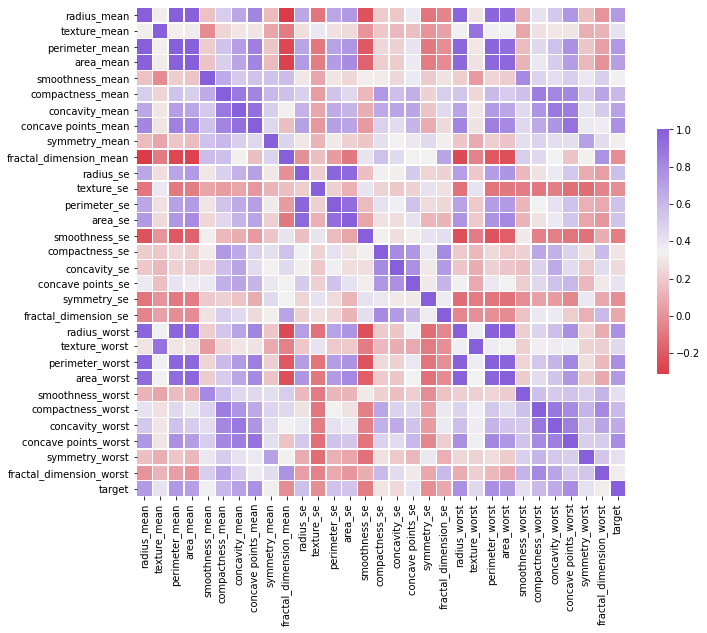

In [18]:
import seaborn as sns
corr = dataset.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 275, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)
plt.show()

Dropping highly related features and keeping one of them

In [19]:
#drop those related features
drop_features = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
              'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
              'compactness_se','concave points_se','texture_worst','area_worst']
dataset.drop(drop_features, axis = 1, inplace = True)

In [20]:
dataset.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,target
0,0.022658,0.363733,0.593753,0.703140,0.686364,0.605518,0.120469,0.273811,0.159296,0.135682,0.311645,0.183042,0.601136,0.568610,0.598462,0.418864,1
1,0.272574,0.501591,0.289880,0.203608,0.379798,0.141323,0.082589,0.125660,0.119387,0.046970,0.084539,0.091110,0.347553,0.192971,0.233590,0.222878,1
2,0.390260,0.449417,0.514309,0.462512,0.509596,0.211247,0.094303,0.162922,0.150831,0.096768,0.205690,0.127006,0.483590,0.359744,0.403706,0.213433,1
3,0.360839,0.102906,0.811321,0.565604,0.776263,1.000000,0.175875,0.038155,0.251453,0.142955,0.728148,0.287205,0.915472,0.548642,1.000000,0.773711,1
4,0.156578,0.489290,0.430351,0.463918,0.378283,0.186816,0.093065,0.163688,0.332359,0.143636,0.136179,0.145800,0.437364,0.319489,0.157500,0.142595,1


In [29]:
X=dataset.iloc[ : , 0:16].values
y=dataset.iloc[ : , -1].values

In [30]:
X

array([[0.0226581 , 0.36373277, 0.59375282, ..., 0.56861022, 0.59846245,
        0.41886396],
       [0.27257355, 0.50159067, 0.28987993, ..., 0.19297125, 0.23358959,
        0.22287813],
       [0.3902604 , 0.44941676, 0.51430893, ..., 0.35974441, 0.40370589,
        0.21343303],
       ...,
       [0.62123774, 0.30311771, 0.28816467, ..., 0.27180511, 0.12872068,
        0.1519087 ],
       [0.66351031, 0.4757158 , 0.58833619, ..., 0.74976038, 0.49714173,
        0.45231536],
       [0.50152181, 0.01590668, 0.        , ..., 0.        , 0.25744136,
        0.10068215]])

In [31]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Splitting dataset into training and test set

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

Applying decision tree classification model-- **ENTROPY MODEL**

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier( criterion='entropy')  
#entropy is the measure of randomness and we split in such a way to bring order into the classifications after split and thus reduce entropy
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction of test set results

In [34]:
y_pred=classifier.predict(X_test)

Applying decision tree classification model-- **GINI MODEL**

In [35]:
clf = DecisionTreeClassifier().fit(X_train,y_train)

Prediction of test set results

In [36]:
y_pred=clf.predict(X_test)
print('training score:',clf.score(X_train,y_train)) #accuracy of training dataset
print('testing score:',clf.score(X_test,y_test))    #accuracy of test set

training score: 1.0
testing score: 0.9298245614035088



So here we can say our model is overfitted..

In [40]:
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

print('training score:',clf.score(X_train,y_train))
print('testing score:',clf.score(X_test,y_test))

training score: 0.9626373626373627
testing score: 0.9210526315789473
